In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import requests
import csv
import urllib.request
%matplotlib inline

import librosa
import numpy as np
import os
import librosa.display
import seaborn as sns

In [2]:
# Opening dataset

df = pd.read_csv('bird_song_dataset.csv')
df.head()

,id,gen,sp,ssp,group,en,rec,cnt,loc,lat,...,rmk,bird-seen,animal-seen,playback-used,temp,regnr,auto,dvc,mic,smp
0,36065,Synallaxis,chinchipensis,NaN,birds,Chinchipe Spinetail,Frank Lambert,Peru,between Jaen and San Ignacio,NaN,...,This taxon is more usually called Chinchipe Sp...,unknown,unknown,unknown,NaN,NaN,no,NaN,NaN,44100
1,692727,Arremon,dorbignii,NaN,birds,Moss-backed Sparrow,Jacob Wijpkema,Bolivia,"Franz Tamayo, La Paz Department",-14.41850,...,"In Bolivia this is now called ""Moss-backed Spa...",yes,yes,no,NaN,NaN,no,NaN,NaN,44100
2,296852,Synallaxis,chinchipensis,NaN,birds,Chinchipe Spinetail,Ross Gallardy,Peru,"San Ignacio, Cajamarca",-5.49810,...,NaN,yes,yes,yes,NaN,NaN,no,NaN,NaN,44100
3,296851,Synallaxis,chinchipensis,NaN,birds,Chinchipe Spinetail,Ross Gallardy,Peru,"San Ignacio, Cajamarca",-5.49810,...,NaN,yes,yes,yes,NaN,NaN,no,NaN,NaN,44100
4,27768,Synallaxis,chinchipensis,NaN,birds,Chinchipe Spinetail,David Edwards,Peru,Chirinos,-5.24667,...,NaN,unknown,unknown,unknown,NaN,NaN,no,NaN,NaN,44100


* Performing Data Analysis

In [3]:
# check null columns
df.isnull()

,id,gen,sp,ssp,group,en,rec,cnt,loc,lat,...,rmk,bird-seen,animal-seen,playback-used,temp,regnr,auto,dvc,mic,smp
0,False,False,False,True,False,False,False,False,False,True,...,False,False,False,False,True,True,False,True,True,False
1,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,True,True,False,True,True,False
2,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,True,True,False,True,True,False
3,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,True,True,False,True,True,False
4,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,True,True,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,True,True,False,True,True,False
496,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,True,True,False,True,True,False
497,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,True,True,False,True,True,False
498,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,True,True,False,True,True,False


In [4]:
df['cnt'].unique()

array(['Peru', 'Bolivia', 'Argentina', 'Papua New Guinea', 'New Zealand',
       'Uruguay', 'Brazil', 'Paraguay', 'Australia', 'Indonesia',
       'Zambia', 'South Africa', 'Senegal', 'India', 'Thailand', 'China',
       'Mongolia', 'Russian Federation', 'South Korea', 'Japan',
       'Cambodia', 'United States', 'Ecuador', 'Colombia', 'Venezuela',
       'Costa Rica', 'Honduras', 'El Salvador', 'Nicaragua', 'Panama',
       'Mexico', 'Guatemala'], dtype=object)

In [5]:
df.columns

Index(['id', 'gen', 'sp', 'ssp', 'group', 'en', 'rec', 'cnt', 'loc', 'lat',
       'lng', 'alt', 'type', 'sex', 'stage', 'method', 'url', 'file',
       'file-name', 'sono', 'osci', 'lic', 'q', 'length', 'time', 'date',
       'uploaded', 'also', 'rmk', 'bird-seen', 'animal-seen', 'playback-used',
       'temp', 'regnr', 'auto', 'dvc', 'mic', 'smp'],
      dtype='object')

In [6]:
df['url'].isnull().sum()

0

In [7]:
df['type'].unique()

array(['call, song', 'song', 'call', 'rattle', 'duet, song', 'duet',
       'alarm (take off)', 'alarm call', 'song, song a',
       'call, flight call, call & flight call', 'fligth', '?',
       'flight call', 'flight call, water lapping',
       'flight call, caco frog', 'alarm call, call',
       'wings flapping sound', 'takeoff noise', 'wingbeats', 'call, duet',
       'canto', 'call, song, call and song', 'alarm call, alarm calls',
       'call, calls', 'call, alternate call', 'song?',
       'call, song, calls. song.', 'chorus', 'flock', 'call, ?',
       'dawn chorus', 'song, duet?', 'uncertain', 'call, allarm calls',
       'call, song, calls', 'call, aggression calls', 'alarm call?',
       'call, calls. wing whirrs.',
       'alarm call, alarm calls, wing sounds',
       'alarm call, agitated alarm calls', 'call, wing sound',
       'wing whirr', 'begging call', 'call, agitated calls',
       'call, contact calls',
       'call, song, contact calls and song by a pair', 'dawn 

## DATA Visualization
 ENSURE THAT ALL FILES ARE COMPATIBLE TO THE MODEL
 

In [8]:
alarm_call = os.path.join("bird_sounds", "alarm_calls", "122322.mp3")
mating_call = os.path.join("bird_sounds", "duet_calls", "10009.mp3")
other_call = os.path.join("bird_sounds", "other_calls", "10011.mp3")

In [9]:
alarm_call

'bird_sounds/alarm_calls/122322.mp3'

In [15]:
y, sr = librosa.load(alarm_call)
print(f'y:{y[:10]}')
print(f'shape y:{y.shape}')
print(f'sr:{sr}')


y:[ 2.9387912e-10  2.4556684e-10 -3.5125297e-10  2.7354238e-10
 -1.2161472e-09 -7.6631979e-10 -6.8121997e-10  4.4296869e-10
 -1.1658153e-09 -2.2395857e-10]
shape y:(3193193,)
sr:22050


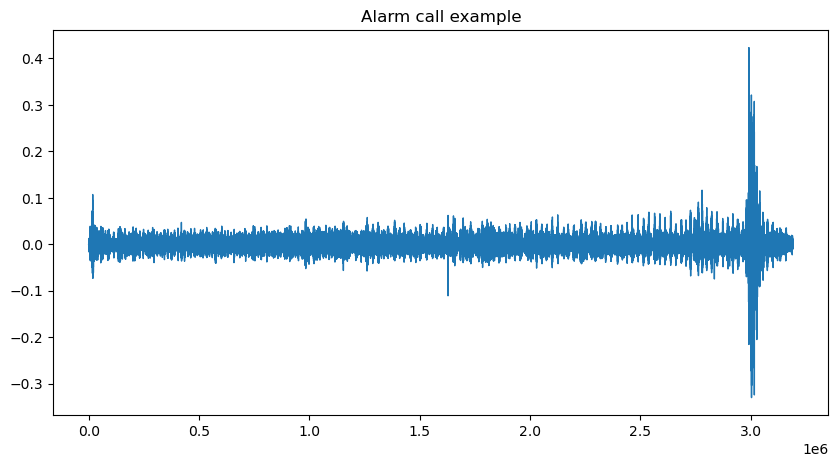

In [19]:
# plotting the numpy array of the audio
pd.Series(y).plot(figsize = (10, 5), lw=1,
                 title = "Alarm call example")
plt.show()

In [20]:
y, sr = librosa.load(mating_call)
print(f'y:{y[:10]}')
print(f'shape y:{y.shape}')
print(f'sr:{sr}')

y:[ 0.01797861  0.00306758 -0.01609175 -0.01392592  0.0006107  -0.0095885
 -0.01828765  0.01992371  0.03507416  0.01223934]
shape y:(124177,)
sr:22050


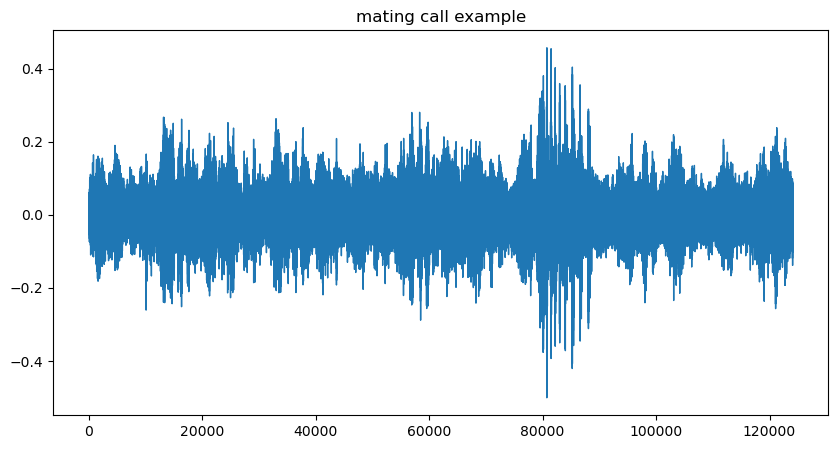

In [21]:
pd.Series(y).plot(figsize = (10, 5), lw=1,
                 title = "mating call example")
plt.show()

In [ ]:
y, sr = librosa.load(other calls)
print(f'y:{y[:10]}')
print(f'shape y:{y.shape}')
print(f'sr:{sr}')